# Machine Learning Homework 2
#### Student: Liyan Xu

## 1. Bias-Variance Trade-off of LASSO
#### While it is hard to write the explicit formula for the bias and variance of using LASSO, we can quantify the expected general trend.

#### (a) What is the general trend of the bias as λ increases?

The bias will increase as $\lambda$ increases, because the model fits less towards data.

#### (b) What about the general trend of the variance as λ increases?

The variance will decrease as $\lambda$ increases, because larger $\lambda$ selects simpler model which lowers the variance.

#### (c) What is the bias at λ=0?

When $\lambda=0$, lasso term is zero. The model is linear regression model without regularization. Let true $y=X\beta+\varepsilon$, where $\varepsilon \sim N(0, \sigma ^2)$.

The bias is:
$$
\begin{align*}
&E[\hat{f}(x_0)] - f^*(x_0)\\
&= E[x_0\hat{\beta}] - x_0\beta\\
&= E[x_0(X^T X)^{-1}X^T y] - x_0\beta\\
&= E[x_0 X^{-1} (X^T)^{-1} X^T (X\beta + \varepsilon)] - x_0\beta\\
&= E[x_0\beta + k \varepsilon] - x_0\beta\\
&= E[k \varepsilon]\\
&= 0
\end{align*}
$$

#### (d) What about the variance at λ = ∞?

When $\lambda = \infty$, the learned $\hat{\beta} = 0$, therefore $\hat{f}(x) = 0$.

The variance is:
$$
E[\hat{f}(x_0) - E[\hat{f}(x_0)]]^2 = E[0 - 0]^2 = 0
$$

## 2. Discriminant Analysis
**Suppose points in $R^{2}$ are being obtained from two classes, C1 and C2, both of which are well described by bivariate Gaussians with means at
$\begin{bmatrix}
0 \\
0 \\
\end{bmatrix}$
and
$\begin{bmatrix}
2 \\
2.5 \\
\end{bmatrix}$
, and covariances
$\begin{bmatrix}
2.5 & 1 \\
1 & 2.5 \\
\end{bmatrix}$
and
$\begin{bmatrix}
2.5 & 1.5 \\
1.5 & 1 \\
\end{bmatrix}$
respectively.**

#### (a) If the priors of C1 and C2 are 0.6 and 0.4 respectively, what is the ideal (i.e. Bayes Optimal) decision boundary?

Bayes Optimal when Gaussian distribution:
$$f(x)=argmaxP(G=k|x)=argmaxP(x|G=k)\pi_{k}=argmax\;Gaussian_{k}(x)\pi_{k}$$

When $x$ is classified as $C1$, we have:
$$Gaussian_{c1}(x)\pi_{c1} > Gaussian_{c2}(x)\pi_{c2}$$

Take $\log$ on both sides and multiply $2$:
$$2\log \pi_{c1} - \log |\Sigma_{c1}| - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1})> 2\log \pi_{c2} - \log |\Sigma_{c2}| - (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2})$$
$$2\log \dfrac{\pi_{c1}}{\pi_{c2}} - \log \dfrac{|\Sigma_{c1}|}{|\Sigma_{c2}|} - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1}) + (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2}) > 0$$

When above equation is $> 0$, $x$ is classified as $C1$. The decision boundry is when
$$2\log \dfrac{\pi_{c1}}{\pi_{c2}} - \log \dfrac{|\Sigma_{c1}|}{|\Sigma_{c2}|} - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1}) + (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2}) = 0$$

Substitue $\pi_{c1}$, $\pi_{c2}$, we have:
$$2\log \dfrac{0.6}{0.4} - \log \dfrac{|\Sigma_{c1}|}{|\Sigma_{c2}|} - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1}) + (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2}) = 0$$

#### (b) Generate 2 datasets from the known distribution. The first one will have 20 training samples (13 points from C1, 7 points from C2), and 10 test samples (6 and 4 points from C1 and C2 respectively). The second dataset will contain 100 training samples (60 from C1, 40 from C2) and 200 test samples (120 from C1, 80 from C2). What is the optimal Bayes error rate on the two test datasets (i.e., how well does the Bayes optimal decision boundary from (a) do)?

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Define means and covs
mean_c1 = np.array([0, 0])
mean_c2 = np.array([2, 2.5])
cov_c1 = np.array([[2.5, 1], [1, 2.5]])
cov_c2 = np.array([[2.5, 1.5], [1.5, 1]])

In [4]:
# Draw random samples from C1 and C2
samples1_c1_train = np.random.multivariate_normal(mean_c1, cov_c1, 13)
samples1_c1_test = np.random.multivariate_normal(mean_c1, cov_c1, 6)

samples2_c1_train = np.random.multivariate_normal(mean_c1, cov_c1, 60)
samples2_c1_test = np.random.multivariate_normal(mean_c1, cov_c1, 120)

samples1_c2_train = np.random.multivariate_normal(mean_c2, cov_c2, 7)
samples1_c2_test = np.random.multivariate_normal(mean_c2, cov_c2, 4)

samples2_c2_train = np.random.multivariate_normal(mean_c2, cov_c2, 40)
samples2_c2_test = np.random.multivariate_normal(mean_c2, cov_c2, 80)

In [5]:
# Define training and test sets
X1_train = np.vstack([samples1_c1_train, samples1_c2_train])
y1_train = np.array([1] * 13 + [2] * 7)
X1_test = np.vstack([samples1_c1_test, samples1_c2_test])
y1_test = np.array([1] * 6 + [2] * 4)

X2_train = np.vstack([samples2_c1_train, samples2_c2_train])
y2_train = np.array([1] * 60 + [2] * 40)
X2_test = np.vstack([samples2_c1_test, samples2_c2_test])
y2_test = np.array([1] * 120 + [2] * 80)

In [6]:
# Define Bayes Optimal class that does binary classification
class BayesOptimalBinary:
    def __init__(self, mean1, mean2, cov1, cov2):
        self.mean1 = mean1
        self.mean2 = mean2
        self.cov1 = cov1
        self.cov2 = cov2
        
        self.cov1_inv = np.linalg.inv(cov1)
        self.cov2_inv = np.linalg.inv(cov2)
        
        self.det_cov1 = np.linalg.det(cov1)
        self.det_cov2 = np.linalg.det(cov2)
        self.log_ratio_of_cov_det = np.log(self.det_cov1 / self.det_cov2)
    
    # Define training method to get prior
    def train(self, y_train):
        self.prior1 = (y_train == 1).sum() / y_train.shape[0]
        self.prior2 = 1 - self.prior1
        self.log_ratio_of_priors = np.log(self.prior1 / self.prior2)
        self.intercept = 2 * self.log_ratio_of_priors - self.log_ratio_of_cov_det
    
    # Define prediction method
    def predict(self, X):
        diff_mean1 = X - self.mean1
        diff_mean2 = X - self.mean2
        
        # np.einsum('ij,ij->i', ...): dot product by rows
        scores = np.einsum('ij,ij->i', diff_mean2 @ self.cov2_inv, diff_mean2)\
                - np.einsum('ij,ij->i', diff_mean1 @ self.cov1_inv, diff_mean1)\
                + self.intercept
        return np.where(scores >= 0, 1, 2)

In [7]:
# Define convenience method to compute error rate
def get_err_rate_optimal(mean1, mean2, cov1, cov2, y_train, X_test, y_test):
    bayes = BayesOptimalBinary(mean1, mean2, cov1, cov2)
    bayes.train(y_train)
    y_predicted = bayes.predict(X_test)
    return np.sum(y_predicted != y_test) / y_test.shape[0]

In [8]:
# Compute error rates
err_rate_optimal_1 = get_err_rate_optimal(mean_c1, mean_c2, cov_c1, cov_c2, y1_train, X1_test, y1_test)
err_rate_optimal_2 = get_err_rate_optimal(mean_c1, mean_c2, cov_c1, cov_c2, y2_train, X2_test, y2_test)
print('Error rate of dataset 1 is %.2f' % err_rate_optimal_1)
print('Error rate of dataset 2 is %.2f' % err_rate_optimal_2)

Error rate of dataset 1 is 0.10
Error rate of dataset 2 is 0.07


#### (c) Create your own implementation of LDA, which allow the user to pass in the training samples (features and response). Test your implementation on the two datasets from (b). What are the error rates on the training data and test data?

The log-ratio of two classes when gaussian distribution with same covariance is:
$$\log \dfrac{P(G=c1|x)}{P(G=c2|x)}
=\log \dfrac{Gaussian_{c1}(x)\pi_{c1}}{Gaussian_{c2}(x)\pi_{c2}}
=\log \dfrac{\pi_{c1}}{\pi_{c2}} - \dfrac{1}{2}(\mu_{c1} + \mu_{c2})^{T}\Sigma^{-1}(\mu_{c1} - \mu_{c2}) + x^{T}\Sigma^{-1}(\mu_{c1} - \mu_{c2})$$

In [9]:
# Define method to estimate Gaussian parameters for each class
# Class is labeled as integer 1, 2, 3...
def estimate_gaussian_params(X, y, same_cov=False):
    K = np.amax(y)    # Total K Classes
    len_k = [0] * K
    mean_k = [None] * K
    cov_k = [None] * K
    prior_k = [0] * K
    for k in range(K):
        X_k = X[y == k+1]
        mean_k[k] = np.mean(X_k, axis=0)
        cov_k[k] = np.cov(X_k, rowvar=False)
        len_k[k] = X_k.shape[0]
        prior_k[k] = len_k[k] / y.shape[0]
    
    if same_cov:
        cov = np.zeros((X.shape[1], X.shape[1]))
        for k in range(K):
            cov += (cov_k[k] * (len_k[k] - 1))
        cov /= (y.shape[0] - K)
        return (prior_k, mean_k, cov)
    else:
        return (prior_k, mean_k, cov_k)

In [10]:
# Define LDA class that does binary classification
class LdaBinary:
    # Define training method
    def train(self, X, y):
        prior_k, mean_k, cov = estimate_gaussian_params(X, y, True)
        self.prior1 = prior_k[0]
        self.prior2 = prior_k[1]
        self.mean1 = mean_k[0]
        self.mean2 = mean_k[1]
        self.cov = cov
        self.cov_inv = np.linalg.inv(cov)
        
        self.diff_mean = (self.mean1 - self.mean2).reshape(X.shape[1], 1)
        self.intercept = np.log(self.prior1 / self.prior2)\
                        - 0.5 * ((self.mean1 + self.mean2).reshape(1, X.shape[1]) @ self.cov_inv @ self.diff_mean)
    
    # Define prediction method
    def predict(self, X):
        scores = (X @ self.cov_inv @ self.diff_mean + self.intercept).reshape(-1)
        return np.where(scores >= 0, 1, 2)

In [11]:
# Define convenience method to compute error rate
def get_err_rate_lda(X_train, y_train, X_test, y_test):
    lda = LdaBinary()
    lda.train(X_train, y_train)
    y_train_predicted = lda.predict(X_train)
    y_test_predicted = lda.predict(X_test)
    
    err_rate_train = np.sum(y_train_predicted != y_train) / y_train.shape[0]
    err_rate_test = np.sum(y_test_predicted != y_test) / y_test.shape[0]
    
    return err_rate_train, err_rate_test

In [12]:
# # Compute error rates for dataset 1
err_rate_lda_train1, err_rate_lda_test1 = get_err_rate_lda(X1_train, y1_train, X1_test, y1_test)
print('Error rate of training set 1 is %.2f' % err_rate_lda_train1)
print('Error rate of test set 1 is %.2f' % err_rate_lda_test1)

Error rate of training set 1 is 0.05
Error rate of test set 1 is 0.20


In [13]:
# Compute error rates for dataset 2
err_rate_lda_train2, err_rate_lda_test2 = get_err_rate_lda(X2_train, y2_train, X2_test, y2_test)
print('Error rate of training set 2 is %.2f' % err_rate_lda_train2)
print('Error rate of test set 2 is %.2f' % err_rate_lda_test2)

Error rate of training set 2 is 0.14
Error rate of test set 2 is 0.14


#### (d) Create your own implementation of QDA, similar to the LDA portion. Test your implementation on the two datasets from (b). What are the error rates on the training data and test data?

The log-ratio of two classes when gaussian distribution with different covariance is:
$$\log \dfrac{P(G=c1|x)}{P(G=c2|x)}
=\log \dfrac{Gaussian_{c1}(x)\pi_{c1}}{Gaussian_{c2}(x)\pi_{c2}}
=2\log \dfrac{\pi_{c1}}{\pi_{c2}} - \log \dfrac{|\Sigma_{c1}|}{|\Sigma_{c2}|} - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1}) + (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2})$$

In [14]:
# Define QDA class that does binary classification
class QdaBinary:
    # Define training method
    def train(self, X, y):
        prior_k, mean_k, cov_k = estimate_gaussian_params(X, y)
        self.prior1 = prior_k[0]
        self.prior2 = prior_k[1]
        self.mean1 = mean_k[0]
        self.mean2 = mean_k[1]
        self.cov1 = cov_k[0]
        self.cov2 = cov_k[1]
        
        self.cov1_inv = np.linalg.inv(self.cov1)
        self.cov2_inv = np.linalg.inv(self.cov2)
        
        self.det_cov1 = np.linalg.det(self.cov1)
        self.det_cov2 = np.linalg.det(self.cov2)
        self.log_ratio_of_cov_det = np.log(self.det_cov1 / self.det_cov2)
        self.log_ratio_of_priors = np.log(self.prior1 / self.prior2)
        self.intercept = 2 * self.log_ratio_of_priors - self.log_ratio_of_cov_det
    
    # Define prediction method
    def predict(self, X):
        diff_mean1 = X - self.mean1
        diff_mean2 = X - self.mean2
        
        # np.einsum('ij,ij->i', ...): dot product by rows
        scores = np.einsum('ij,ij->i', diff_mean2 @ self.cov2_inv, diff_mean2)\
                - np.einsum('ij,ij->i', diff_mean1 @ self.cov1_inv, diff_mean1)\
                + self.intercept
        return np.where(scores >= 0, 1, 2)

In [15]:
# Define convenience method to compute error rate
def get_err_rate_qda(X_train, y_train, X_test, y_test):
    qda = QdaBinary()
    qda.train(X_train, y_train)
    y_train_predicted = qda.predict(X_train)
    y_test_predicted = qda.predict(X_test)
    
    err_rate_train = np.sum(y_train_predicted != y_train) / y_train.shape[0]
    err_rate_test = np.sum(y_test_predicted != y_test) / y_test.shape[0]
    
    return err_rate_train, err_rate_test

In [16]:
# # Compute error rates for dataset 1
err_rate_qda_train1, err_rate_qda_test1 = get_err_rate_qda(X1_train, y1_train, X1_test, y1_test)
print('Error rate of training set 1 is %.2f' % err_rate_qda_train1)
print('Error rate of test set 1 is %.2f' % err_rate_qda_test1)

Error rate of training set 1 is 0.05
Error rate of test set 1 is 0.10


In [17]:
# # Compute error rates for dataset 2
err_rate_qda_train2, err_rate_qda_test2 = get_err_rate_qda(X2_train, y2_train, X2_test, y2_test)
print('Error rate of training set 2 is %.2f' % err_rate_qda_train2)
print('Error rate of test set 2 is %.2f' % err_rate_qda_test2)

Error rate of training set 2 is 0.09
Error rate of test set 2 is 0.07


#### (e) Suppose the cost of misclassifying an input actually belonging to C1 is twice as expensive as misclassifying an input belonging to C2. Correct classification does not incur any cost. If the objective is to minimize the expected cost rather than expected misclassification rate, how would this change the Bayes optimal decision boundary from (a)?

In a more generalized case, let the cost of misclassifying an input actually belonging to C1 is $k$ times as expensive as misclassifying an input belonging to C2.

Let $f$ be the classifier, $f^*$ be the optimal classifier, $y$ be the correct label. $R(f) = E[L(f), y]$ be the risk given loss $L$ as a function of $f$ and $y$.

For binary classification, let's use the loss function as follows:
$$
L(f) = \begin{cases}
1 & f(x) = c1\;\&\;y = c2\\
k & f(x) = c2\;\&\;y = c1\\
0 & f(x) = y
\end{cases}
$$

The optimal classifier $f^{*}$ is:
$$
\begin{align*}
f^{*} &= argmin\;R(f)\\
&= argmin\;E[L(f), y]\\
&= argmin\;(P(y=c2|x)\mathbb{1}_{f(x)=c1} + kP(y=c1|x)\mathbb{1}_{f(x)=c2})\\
&= argmin\;(P(y=c2|x)\mathbb{1}_{f(x)=c1} + kP(y=c1|x)(1-\mathbb{1}_{f(x)=c1}))\\
&= argmin\;(kP(y=c1|x) + (P(y=c2|x) - kP(y=c1|x))\mathbb{1}_{f(x)=c1})\\
&= \begin{cases}
c1 & kP(y=c1|x) > P(y=c2|x)\\
c2 & Otherwise
\end{cases}
\end{align*}
$$

In this case, $k = 2$, so the optimal $f^{*}$ is:
$$
f^{*} =
\begin{cases}
c1 & 2P(y=c1|x) > P(y=c2|x)\\
c2 & Otherwise
\end{cases}
$$

And the decision boundary changes to:
$$
2P(y=c1|x) = P(y=c2|x)\\
2Gaussian_{c1}(x)\pi_{c1} = Gaussian_{c2}(x)\pi_{c2}\\
2\log 2 + 2\log \dfrac{\pi_{c1}}{\pi_{c2}} - \log \dfrac{|\Sigma_{c1}|}{|\Sigma_{c2}|} - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1}) + (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2}) = 0
$$
If $\log$ is base $2$, then the dicision boundary is:
$$
2 + 2\log \dfrac{\pi_{c1}}{\pi_{c2}} - \log \dfrac{|\Sigma_{c1}|}{|\Sigma_{c2}|} - (x-\mu_{c1})^T\Sigma_{c1}^{-1}(x-\mu_{c1}) + (x-\mu_{c2})^T\Sigma_{c2}^{-1}(x-\mu_{c2}) = 0
$$

## 3. Spam classification using Naive Bayes and Standard Logistic Regression
#### Consider the email spam dataset, which contains 4601 e-mail messages that have been split into 3000 training (spam.train.dat) and 1601 test emails (spam.test.dat). 57 features have been extracted with a binary label in the last column. You can read more about the data at the UCI repository (https://archive.ics.uci.edu/ml/datasets/spambase).

#### (a) You will explore the effects of feature preprocessing and its impact on Naive Bayes and Standard (unregularized) logistic regression. Preprocess your data in the following ways (they are independent of one another and should not build on each step):
**1. No preprocessing.**<br>
**2. Standardize the columns so they all have mean 0 and unit variance. Note that you want to apply the transformation you learned on the training data to the test data. In other words, the test data may not have mean of 0 and unit variance.**<br>
**3. Transform the features using $\log (x_{ij} + 0.1)$.**<br>
**4. Binarize the features using $\mathbb{1}_{x_{ij}>0}$ (Note that $\mathbb{1}$ denotes the indicator function).**<br>
**You are free to use any preprocessing module (e.g., sklearn.preprocessing).**

In [18]:
from sklearn import preprocessing

# Load data from file
data_train = np.genfromtxt('spam.train.dat')
data_test = np.genfromtxt('spam.test.dat')

In [19]:
# Set features and target
X_train = data_train[:, :-1]
y_train = data_train[:, -1].astype(int)

X_test = data_test[:, :-1]
y_test = data_test[:, -1].astype(int)

In [20]:
# Preprocessing 1: no preprocessing
X1_train = X_train
X1_test = X_test

In [21]:
# Preprocessing 2: standardization
scaler = preprocessing.StandardScaler().fit(X_train)
X2_train = scaler.transform(X_train)
X2_test = scaler.transform(X_test)

In [22]:
# Preprocessing 3: log(x+0.1)
X3_train = np.log(X_train + 0.1)
X3_test = np.log(X_test + 0.1)

In [23]:
# Preprocessing 4: binarization
binarizer = preprocessing.Binarizer().fit(X_train)
X4_train = binarizer.transform(X_train)
X4_test = binarizer.transform(X_test)

#### (b) Fit a Naive Bayes model to each of the four preprocessing steps above using only the training data. You are free to use any existing packages. Report the accuracy rate and AUC on the training and test sets.

In [24]:
# Create Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

nb = GaussianNB()
fpr_bayes = [None] * 4
tpr_bayes = [None] * 4

# Define convenience method to calculate AR and AUC, and return ROC for test set
def calc_scores(cls, X_train, y_train, X_test, y_test, identifier):
    cls.fit(X_train, y_train)
    
    ar_train = cls.score(X_train, y_train)
    ar_test = cls.score(X_test, y_test)
    
    auc_train = roc_auc_score(y_train, cls.predict_proba(X_train)[:, 1])
    y_positive_prob = cls.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, y_positive_prob)
    
    print('Accuracy Rate on training set %s is %.2f' % (identifier, ar_train))
    print('Accuracy Rate on test set %s is %.2f' % (identifier, ar_test))
    print('AUC on training set %s is %.2f' % (identifier, auc_train))
    print('AUC on test set %s is %.2f' % (identifier, auc_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_positive_prob)
    return fpr, tpr

In [25]:
# Show AR and AUC scores on preprocessed data 1
fpr_bayes[0], tpr_bayes[0] = calc_scores(nb, X1_train, y_train, X1_test, y_test, '1')

Accuracy Rate on training set 1 is 0.83
Accuracy Rate on test set 1 is 0.82
AUC on training set 1 is 0.95
AUC on test set 1 is 0.94


In [26]:
# Show AR and AUC scores on preprocessed data 2
fpr_bayes[1], tpr_bayes[1] = calc_scores(nb, X2_train, y_train, X2_test, y_test, '2')

Accuracy Rate on training set 2 is 0.82
Accuracy Rate on test set 2 is 0.81
AUC on training set 2 is 0.89
AUC on test set 2 is 0.88


In [27]:
# Show AR and AUC scores on preprocessed data 3
fpr_bayes[2], tpr_bayes[2] = calc_scores(nb, X3_train, y_train, X3_test, y_test, '3')

Accuracy Rate on training set 3 is 0.82
Accuracy Rate on test set 3 is 0.82
AUC on training set 3 is 0.95
AUC on test set 3 is 0.95


In [28]:
# Show AR and AUC scores on preprocessed data 4
fpr_bayes[3], tpr_bayes[3] = calc_scores(nb, X4_train, y_train, X4_test, y_test, '4')

Accuracy Rate on training set 4 is 0.80
Accuracy Rate on test set 4 is 0.80
AUC on training set 4 is 0.95
AUC on test set 4 is 0.94


#### (c) Fit a standard (no regularization) logistic regression model to each of the four preprocessing steps above using only the training data. You are free to use any existing packages. Report the accuracy rate and AUC on the training and test sets.

In [29]:
# Create Logistic Regression model
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression(C=1e9, warm_start=False)   # Set inverse of reg strength to large number
fpr_lgr = [None] * 4
tpr_lgr = [None] * 4

In [30]:
# Show AR and AUC scores on preprocessed data 1
fpr_lgr[0], tpr_lgr[0] = calc_scores(lgr, X1_train, y_train, X1_test, y_test, '1')

Accuracy Rate on training set 1 is 0.93
Accuracy Rate on test set 1 is 0.92
AUC on training set 1 is 0.98
AUC on test set 1 is 0.97


In [31]:
# Show AR and AUC scores on preprocessed data 2
fpr_lgr[1], tpr_lgr[1] = calc_scores(lgr, X2_train, y_train, X2_test, y_test, '2')

Accuracy Rate on training set 2 is 0.93
Accuracy Rate on test set 2 is 0.92
AUC on training set 2 is 0.98
AUC on test set 2 is 0.97


In [32]:
# Show AR and AUC scores on preprocessed data 3
fpr_lgr[2], tpr_lgr[2] = calc_scores(lgr, X3_train, y_train, X3_test, y_test, '3')

Accuracy Rate on training set 3 is 0.95
Accuracy Rate on test set 3 is 0.94
AUC on training set 3 is 0.99
AUC on test set 3 is 0.98


In [33]:
# Show AR and AUC scores on preprocessed data 4
fpr_lgr[3], tpr_lgr[3] = calc_scores(lgr, X4_train, y_train, X4_test, y_test, '4')

Accuracy Rate on training set 4 is 0.94
Accuracy Rate on test set 4 is 0.93
AUC on training set 4 is 0.98
AUC on test set 4 is 0.98


#### (d) Plot the receiver operating characteristic (ROC) curves derived from the test data for each of the eight models (4 Naive Bayes, 4 logistic regression models). Comment on how the models compare with one another with regards to ROC, AUC, and accuracy.

In [34]:
# Define convenience method to plot ROC curves
def plot_roc(fpr, tpr, identifier):
    ax = plt.gca()
    lineObjects = [ax.plot(fpr[i], tpr[i], label='dataset '+str(i+1)) for i in range(len(fpr))]
    ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for ' + identifier)
    ax.legend()
    plt.show()

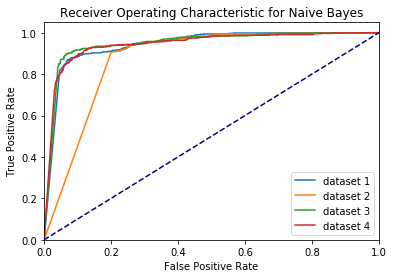

In [35]:
# Plot ROC curves for Naive Bayes
plot_roc(fpr_bayes, tpr_bayes, 'Naive Bayes')

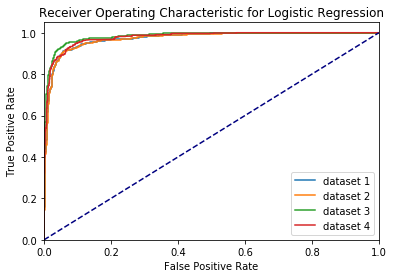

In [36]:
# Plot ROC curves for Logistic Regression
plot_roc(fpr_lgr, tpr_lgr, 'Logistic Regression')

From the ROC, AUC and accuracy, we can see that:
1. Each preprocessed dataset doesn't have much impact on performance for both Naive Bayes and Logistic Regression models; the four datasets lead to similar ROC, AUC and accuracy for both models.
2. Particularly, dataset 3 using $\log (x_{ij}+0.1)$ yields the best ROC, AUC and accuracy for both models; therefore, $\log (x_{ij}+0.1)$ is the best preprocessing method among the four methods for both models.
3. Logistic Regression model outperforms Naive Bayes model for each preprocessing method; therefore, Logistic Regression is preferred over Naive Bayes for this problem.

## 4. Exploring Model Selection Strategies for Logistic Regression with Regularization
#### We will be using the SPAM dataset from the previous part for this problem. You can preprocess the data however you see fit, either based on the results of the previous problem or introducing another preprocessing method. The only requirement is that it is consistent throughout the rest of this problem.

#### (a) Implement the validation/hold-out technique for logistic regression (regularized model), where the performance is reported for the validation portion. Your implementation should work for any user-specified split ratio (this will help with the later parts of this problem).

In [65]:
# Define method of hold-out validation
import math

def cv_holdout(lgr, lambdas, X, y, ratio_holdout):
    # Get training and validation set
    idx_shuffle = np.arange(y.shape[0])
    np.random.shuffle(idx_shuffle)
    cnt_holdout = math.floor(y.shape[0] * ratio_holdout)
    X_train = X[idx_shuffle[cnt_holdout:]]
    y_train = y[idx_shuffle[cnt_holdout:]]
    X_valid = X[idx_shuffle[:cnt_holdout]]
    y_valid = y[idx_shuffle[:cnt_holdout]]
    
    # Search parameter lambda
    lambda_best = None
    accuracy_best = 0
    for lambda_ in lambdas:
        lgr.set_params(C=1/lambda_, warm_start=False)
        lgr.fit(X_train, y_train)
        
        accuracy = lgr.score(X_valid, y_valid)
        if accuracy > accuracy_best:
            accuracy_best = accuracy
            lambda_best = lambda_
    
    return lambda_best, accuracy_best

#### (b) Implement the k-fold cross-validation approach for logistic regression (regularized model), where the performance is reported from the k-different validation. Your implementation should work for any user-specified k.

In [80]:
# Define method of k-fold cross-validation
def cv_kfold(lgr, lambdas, X, y, K):
    lambda_best = None
    accuracy_best = 0
    
    cnt_fold = math.ceil(y.shape[0] / K)
    idx_shuffle = np.arange(y.shape[0])
    np.random.shuffle(idx_shuffle)
    
    for lambda_ in lambdas:
        accuracies = []
        idx_pre = 0
        for i in range(K):
            idx_valid = idx_shuffle[idx_pre : idx_pre+cnt_fold]
            idx_train = np.hstack((idx_shuffle[:idx_pre], idx_shuffle[idx_pre+cnt_fold:]))
            idx_pre += cnt_fold
            X_train = X[idx_train]
            y_train = y[idx_train]
            X_valid = X[idx_valid]
            y_valid = y[idx_valid]
            
            lgr.set_params(C=1/lambda_, warm_start=False)
            lgr.fit(X_train, y_train)
            accuracies.append(lgr.score(X_valid, y_valid))
            
        accuracy_mean = np.array(accuracies).mean()
        if accuracy_mean > accuracy_best:
            accuracy_best = accuracy_mean
            lambda_best = lambda_
    
    return lambda_best, accuracy_best

#### (c) Fit ridge and LASSO using the validation/hold-out technique by searching over a variety of split ratios and regularization parameters. For each unique split ratio, specify the best ‘parameter’, report the validation error, and the test error generated from training on all the training data using the best parameter.

In [73]:
# Define convenience method to search best parameter by holdout validation
import pandas as pd

def search_param_by_holdout(lgr, lambdas, ratios, X_train, y_train, X_test, y_test):
    result = []
    for ratio in ratios:
        lambda_, accuracy_valid = cv_holdout(lgr, lambdas, X_train, y_train, ratio)
        lgr.set_params(C=1/lambda_, warm_start=False)
        lgr.fit(X_train, y_train)
        accuracy_test = lgr.score(X_test, y_test)
        result.append([lambda_, 1-accuracy_valid, 1-accuracy_test])
        
    return pd.DataFrame(result, ratios, ['lambda', 'Validation Error', 'Test Error'])

In [70]:
# Search best parameter for ridge
lgr_ridge = LogisticRegression(penalty='l2', warm_start=False)
search_param_by_holdout(lgr_ridge, np.logspace(-3, 2, 100), np.linspace(0.1, 0.9, 9),
                        X3_train, y_train, X3_test, y_test)

,lambda,Validation Error,Test Error
0.1,0.001000,0.056667,0.063086
0.2,0.001000,0.045000,0.063086
0.3,15.556761,0.053333,0.061836
0.4,6.892612,0.047500,0.063086
0.5,17.475284,0.055333,0.061836
0.6,10.974988,0.055000,0.062461
0.7,3.853529,0.061905,0.061836
0.8,5.462277,0.065833,0.061212
0.9,3.053856,0.065556,0.061212


In [72]:
# Search best parameter for lasso
lgr_lasso = LogisticRegression(penalty='l1', warm_start=False)
search_param_by_holdout(lgr_lasso, np.logspace(-3, 2, 10), np.linspace(0.1, 0.9, 9),
                        X3_train, y_train, X3_test, y_test)

,lambda,Validation Error,Test Error
0.1,0.003594,0.053333,0.061836
0.2,0.599484,0.048333,0.062461
0.3,2.154435,0.068889,0.061836
0.4,7.742637,0.053333,0.061836
0.5,7.742637,0.053333,0.061836
0.6,7.742637,0.063889,0.061836
0.7,2.154435,0.053333,0.061836
0.8,2.154435,0.072917,0.061836
0.9,2.154435,0.059259,0.061836


#### (d) Fit ridge and LASSO using the k-fold cross-validation approach by searching over k = 2,5,10 and regularization parameters. For value of k, specify the best ‘parameter’, report the average validation error, and the test error generated from training on all the training data using the best parameter.

In [85]:
# Define convenience method to search best parameter by k-fold validation
def search_param_by_kfold(lgr, lambdas, Ks, X_train, y_train, X_test, y_test):
    result = []
    for K in Ks:
        print('Processing K = %d' % K)
        lambda_, accuracy_valid = cv_kfold(lgr, lambdas, X_train, y_train, K)
        lgr.set_params(C=1/lambda_, warm_start=False)
        lgr.fit(X_train, y_train)
        accuracy_test = lgr.score(X_test, y_test)
        result.append([lambda_, 1-accuracy_valid, 1-accuracy_test])
        
    return pd.DataFrame(result, Ks, ['lambda', 'Validation Error', 'Test Error'])

In [86]:
# Search best parameter for ridge
search_param_by_kfold(lgr_ridge, np.logspace(-3, 2, 20), [2, 5, 10],
                        X3_train, y_train, X3_test, y_test)

Processing K = 2
Processing K = 5
Processing K = 10


,lambda,Validation Error,Test Error
2,2.636651,0.056667,0.061836
5,2.636651,0.055333,0.061836
10,8.858668,0.056333,0.062461


In [84]:
# Search best parameter for lasso
search_param_by_kfold(lgr_lasso, np.logspace(-3, 2, 10), [2, 5, 10],
                        X3_train, y_train, X3_test, y_test)

,lambda,Validation Error,Test Error
2,7.742637,0.058333,0.061836
5,0.599484,0.056333,0.061212
10,2.154435,0.056667,0.061836


#### (e) Fit ridge and LASSO using the Monte Carlo Cross-validation approach with 10 samples (i.e., use the validation/hold-out technique from (a) 10 times). For the different user-specified split ratio, specify the best ‘parameter’, report the average validation error, and the test error generated from training on all the training data using the best parameter.

In [92]:
# Define convenience method to search best parameter by Monte Carlo validation
def search_param_by_monte_carlo(lgr, lambdas, ratios, sampling, X_train, y_train, X_test, y_test):
    result = []
    for ratio in ratios:
        print('Processing ratio = %.1f' % ratio)
        lambda_best = None
        accuracy_valid_best = 0
        for lambda_ in lambdas:
            accuracies_valid = []
            for i in range(sampling):
                _, accuracy_valid = cv_holdout(lgr, [lambda_], X_train, y_train, ratio)
                accuracies_valid.append(accuracy_valid)
            accuracy_valid_mean = np.array(accuracies_valid).mean()
            if accuracy_valid_mean > accuracy_valid_best:
                accuracy_valid_best = accuracy_valid_mean
                lambda_best = lambda_
        
        lgr.set_params(C=1/lambda_best, warm_start=False)
        lgr.fit(X_train, y_train)
        accuracy_test = lgr.score(X_test, y_test)
        result.append([lambda_best, 1-accuracy_valid_best, 1-accuracy_test])
        
    return pd.DataFrame(result, ratios, ['lambda', 'Validation Error', 'Test Error'])

In [93]:
# Search best parameter for ridge
search_param_by_monte_carlo(lgr_ridge, np.logspace(-3, 2, 20), np.linspace(0.1, 0.9, 9), 10,
                        X3_train, y_train, X3_test, y_test)

Processing ratio = 0.1
Processing ratio = 0.2
Processing ratio = 0.3
Processing ratio = 0.4
Processing ratio = 0.5
Processing ratio = 0.6
Processing ratio = 0.7
Processing ratio = 0.8
Processing ratio = 0.9


,lambda,Validation Error,Test Error
0.1,0.020691,0.051000,0.061836
0.2,0.020691,0.055500,0.061836
0.3,2.636651,0.054889,0.061836
0.4,8.858668,0.056833,0.062461
0.5,2.636651,0.056800,0.061836
0.6,4.832930,0.057111,0.061212
0.7,8.858668,0.061381,0.062461
0.8,8.858668,0.063208,0.062461
0.9,4.832930,0.069778,0.061212


In [94]:
# Search best parameter for lasso
search_param_by_monte_carlo(lgr_lasso, np.logspace(-3, 2, 10), np.linspace(0.1, 0.9, 9), 10,
                        X3_train, y_train, X3_test, y_test)

Processing ratio = 0.1
Processing ratio = 0.2
Processing ratio = 0.3
Processing ratio = 0.4
Processing ratio = 0.5
Processing ratio = 0.6
Processing ratio = 0.7
Processing ratio = 0.8
Processing ratio = 0.9


,lambda,Validation Error,Test Error
0.1,0.046416,0.051333,0.061212
0.2,7.742637,0.051500,0.061836
0.3,7.742637,0.057111,0.061836
0.4,0.166810,0.058500,0.061836
0.5,2.154435,0.056467,0.061836
0.6,2.154435,0.058111,0.061836
0.7,2.154435,0.058810,0.061836
0.8,2.154435,0.064500,0.061836
0.9,2.154435,0.072963,0.061836


#### (f) Comment on how the different model selection techniques compare with one another with regards to AUC and classification error, robustness of the validation estimate, and the computational complexities of the three different hold-out techniques.

1. From the computational complexities perspective, Monte Carlo cross-validation is the most expensive, K-fold cross-validation is the second, holdout technique is the cheapest.
2. K-Fold and Monte Carlo validations are pretty robust, and both achieve similar accuracy. Holdout is less robust and has high variance, because it doesn't average over several samples.